### Import Library

In [10]:
# sys module
import nltk
from nltk.corpus import stopwords
from nltk.classify import naivebayes
import string
from sklearn.model_selection import train_test_split, LeavePOut, KFold, LeaveOneOut, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from itertools import combinations, permutations

# third parties module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read Data

In [11]:
imdb = pd.read_csv ("data/imdb_labelled.txt", sep='\t', names=['comment', 'sentiment'], header=None)
amazon = pd.read_csv ("data/amazon_cells_labelled.txt", sep='\t', names=['comment', 'sentiment'], header=None)
yelp = pd.read_csv ("data/yelp_labelled.txt", sep='\t', names=['comment', 'sentiment'], header=None)

In [12]:
data = [imdb, amazon, yelp]

### Preprocessing

In [13]:
stopword = stopwords.words ('english')
def preprocessing (comment):
    # remove punctuation
    for p in string.punctuation:
        comment = comment.replace (p, ' ')  
    # tokenize
    words = set (nltk.word_tokenize (comment.lower ()))
    # remove char less than 3
    words = set ([w for w in words if len (w) > 3])  
    # remove stopwords
    words = words - set (stopword)
    
    return words

for x in data:
    x['word'] = x['comment'].apply (preprocessing)

### Feature Extraction

In [14]:
# feature extraction
def extract_feature (word):
    feature = {}
    for w in word:
        feature[w] = True
    return feature

for x in data:
    x['feature'] = x['word'].apply (extract_feature)

#### Visualization Function 

In [15]:
name = ['IMDb', 'Amazon', 'Yelp']

for i in range(len(data)):
    data[i]['name'] = name[i]

In [16]:
# bar chart function

def create_bar_chart(performance, materials, yLabel, chartTitle):
    x_pos = np.arange(len(materials))
    fig, ax = plt.subplots()
    bar_plot = ax.bar(x_pos, performance, align='center', alpha=0.5, ecolor='black', capsize=10, color='mcygb')
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.93*height, performance[idx], ha='center', va='bottom', rotation=0)  
    ax.set_ylabel(yLabel)
    ax.set_ylim(0,1)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(materials)
    ax.set_title(chartTitle)
    ax.yaxis.grid(True)

In [17]:
# bar chart with error bar function

def create_bar_with_error_chart(CTEs, error, materials, yLabel, chartTitle):
    x_pos = np.arange(len(CTEs))
    fig, ax = plt.subplots()
    bar_plot = ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, color='mcygb')
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/1.2, 1.0*height, CTEs[idx], ha='center', va='bottom', rotation=0)  
    ax.set_ylabel(yLabel)
    ax.set_ylim(0,1)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(materials)
    ax.set_title(chartTitle)
    ax.yaxis.grid(True)

### Clasification

#### Condition 1 --> 1 dataset untuk dengan KFOLD

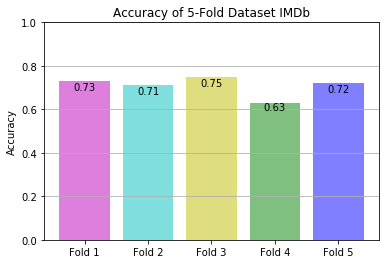

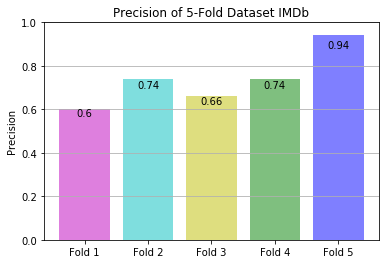

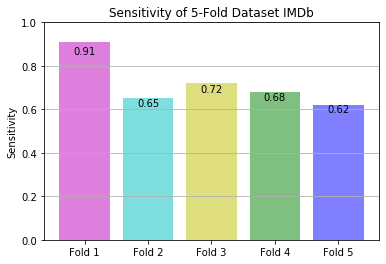

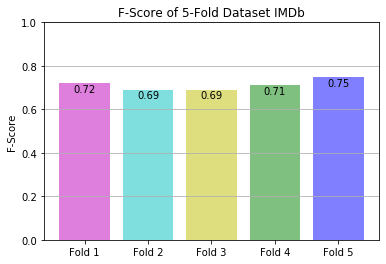

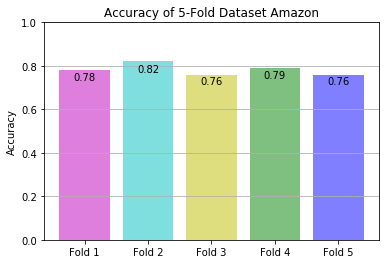

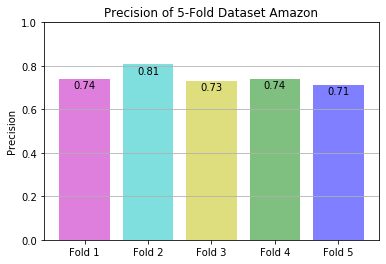

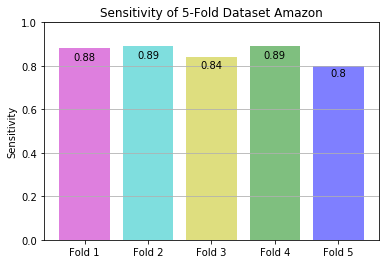

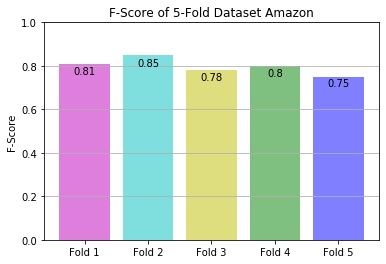

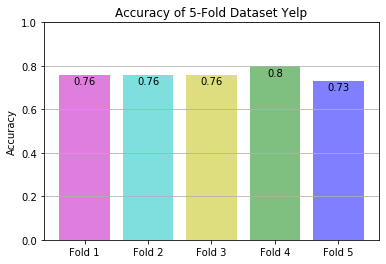

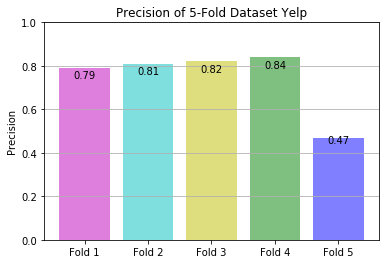

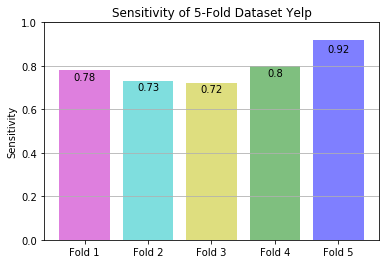

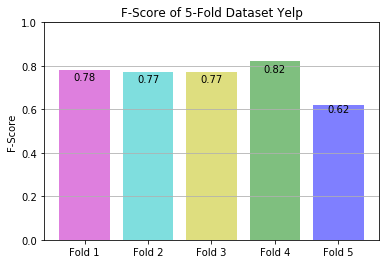

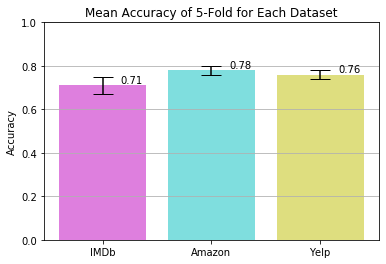

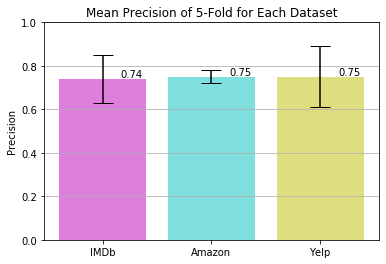

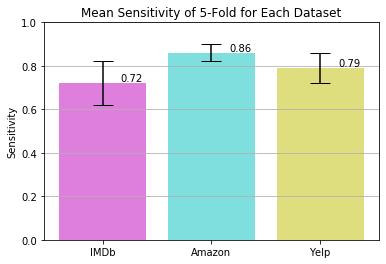

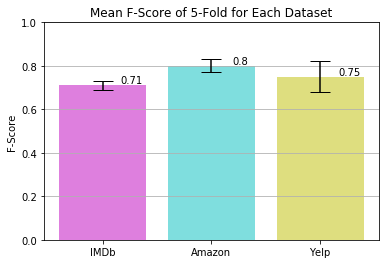

In [18]:
# prepare data for visualization
materials = ['Fold ' + str(i+1) for i in range(5)]
mean_accuracy_each_dataset = []
stdev_accuracy_each_dataset = []
mean_sensitivity_each_dataset = []
stdev_sensitivity_each_dataset = []
mean_precision_each_dataset = []
stdev_precision_each_dataset = []
mean_f1score_each_dataset = []
stdev_f1score_each_dataset = []
materials_each_dataset = []

for x in data:
    accuracy_list = []
    precision_list = []
    sensitivity_list = []
    fscore_list = []
    X = x['feature'].values
    Y = x['sentiment'].values
    kf = KFold(n_splits=5)
    for train, test in kf.split(X):
        classifier = naivebayes.NaiveBayesClassifier.train(np.concatenate((X[train].reshape(-1,1), Y[train].reshape(-1,1)), axis=1))
        predicted = classifier.classify_many(X[test])
        accuracy_list.append(round(accuracy_score(Y[test], predicted), 2))
        precision_list.append(round(precision_score(Y[test], predicted), 2))
        sensitivity_list.append(round(recall_score(Y[test], predicted), 2))
        fscore_list.append(round(f1_score(Y[test], predicted), 2))

    # create bar chart for K-Fold  
    create_bar_chart(accuracy_list, materials, 'Accuracy', 'Accuracy of 5-Fold Dataset ' + x['name'][0])
    create_bar_chart(precision_list, materials, 'Precision', 'Precision of 5-Fold Dataset ' + x['name'][0])
    create_bar_chart(sensitivity_list, materials, 'Sensitivity', 'Sensitivity of 5-Fold Dataset ' + x['name'][0])
    create_bar_chart(fscore_list, materials, 'F-Score', 'F-Score of 5-Fold Dataset ' + x['name'][0])
    # create data for visualization
    mean_accuracy_each_dataset.append(round(np.mean(accuracy_list),2))
    stdev_accuracy_each_dataset.append(round(np.std(accuracy_list),2))
    mean_precision_each_dataset.append(round(np.mean(precision_list),2))
    stdev_precision_each_dataset.append(round(np.std(precision_list),2))
    mean_sensitivity_each_dataset.append(round(np.mean(sensitivity_list),2))
    stdev_sensitivity_each_dataset.append(round(np.std(sensitivity_list),2))
    mean_f1score_each_dataset.append(round(np.mean(fscore_list),2))
    stdev_f1score_each_dataset.append(round(np.std(fscore_list),2))
    materials_each_dataset.append(x['name'][0])
    
# create bar chart with error for each dataset
create_bar_with_error_chart(mean_accuracy_each_dataset, stdev_accuracy_each_dataset, materials_each_dataset, 'Accuracy', 'Mean Accuracy of 5-Fold for Each Dataset')
create_bar_with_error_chart(mean_precision_each_dataset, stdev_precision_each_dataset, materials_each_dataset, 'Precision', 'Mean Precision of 5-Fold for Each Dataset')
create_bar_with_error_chart(mean_sensitivity_each_dataset, stdev_sensitivity_each_dataset, materials_each_dataset, 'Sensitivity', 'Mean Sensitivity of 5-Fold for Each Dataset')
create_bar_with_error_chart(mean_f1score_each_dataset, stdev_f1score_each_dataset, materials_each_dataset, 'F-Score', 'Mean F-Score of 5-Fold for Each Dataset')

#### Condition 2 --> 1 dataset untuk train, 1 dataset untuk test

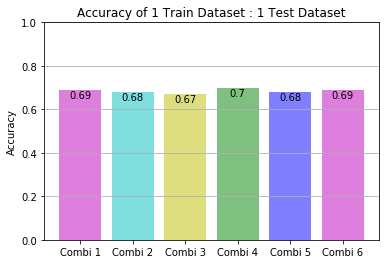

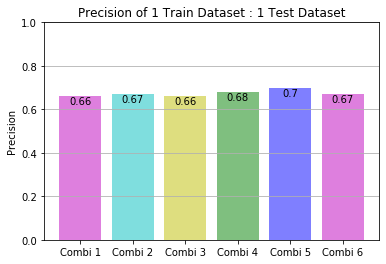

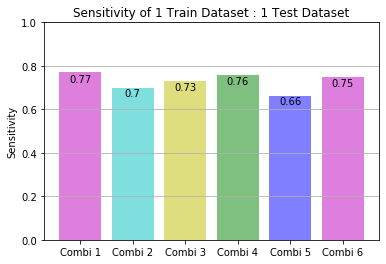

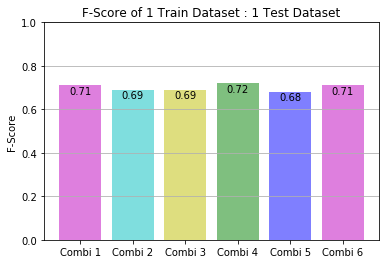

In [19]:
list_index = np.arange(len(data))
list_combination = permutations(list_index, 2)
list_combination = [list(x) for x in list_combination]
accuracy_list = []
precision_list = []
sensitivity_list = []
fscore_list = []
materials = ['Combi ' + str(i+1) for i in range(len(list_combination))]
for comb in list_combination:
    classifier = naivebayes.NaiveBayesClassifier.train(data[comb[0]][['feature','sentiment']].values)
    predicted = classifier.classify_many(data[comb[1]]['feature'].values)
    accuracy_list.append(round(accuracy_score(data[comb[1]]['sentiment'].values, predicted), 2))
    precision_list.append(round(precision_score(data[comb[1]]['sentiment'].values, predicted), 2))
    sensitivity_list.append(round(recall_score(data[comb[1]]['sentiment'].values, predicted), 2))
    fscore_list.append(round(f1_score(data[comb[1]]['sentiment'].values, predicted), 2))

# create bar chart for 1 train dataset : 1 test dataset
create_bar_chart(accuracy_list, materials, 'Accuracy', 'Accuracy of 1 Train Dataset : 1 Test Dataset')
create_bar_chart(precision_list, materials, 'Precision', 'Precision of 1 Train Dataset : 1 Test Dataset')
create_bar_chart(sensitivity_list, materials, 'Sensitivity', 'Sensitivity of 1 Train Dataset : 1 Test Dataset')
create_bar_chart(fscore_list, materials, 'F-Score', 'F-Score of 1 Train Dataset : 1 Test Dataset')

#### Condition 3 --> 2 dataset untuk train, 1 dataset untuk test

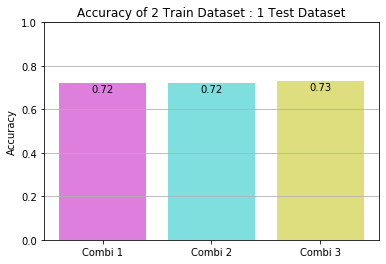

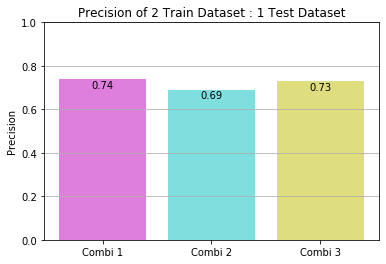

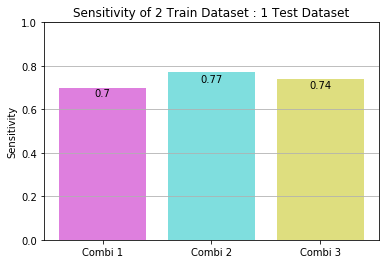

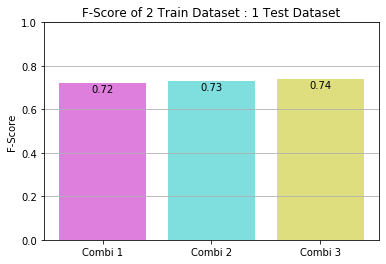

In [20]:
list_index = np.arange(len(data))
loo = LeaveOneOut()
accuracy_list = []
precision_list = []
sensitivity_list = []
fscore_list = []
materials = ['Combi ' + str(i+1) for i in range(len(list_index))]
for train, test in loo.split(list_index):
    classifier = naivebayes.NaiveBayesClassifier.train(np.concatenate((data[train[0]][['feature','sentiment']].values,data[train[1]][['feature','sentiment']].values)))
    predicted = classifier.classify_many(data[test[0]]['feature'].values)
    accuracy_list.append(round(accuracy_score(data[test[0]]['sentiment'].values, predicted), 2))
    precision_list.append(round(precision_score(data[test[0]]['sentiment'].values, predicted), 2))
    sensitivity_list.append(round(recall_score(data[test[0]]['sentiment'].values, predicted), 2))
    fscore_list.append(round(f1_score(data[test[0]]['sentiment'].values, predicted), 2))
    
# create bar chart for 2 train dataset : 1 test dataset
create_bar_chart(accuracy_list, materials, 'Accuracy', 'Accuracy of 2 Train Dataset : 1 Test Dataset')
create_bar_chart(precision_list, materials, 'Precision', 'Precision of 2 Train Dataset : 1 Test Dataset')
create_bar_chart(sensitivity_list, materials, 'Sensitivity', 'Sensitivity of 2 Train Dataset : 1 Test Dataset')
create_bar_chart(fscore_list, materials, 'F-Score', 'F-Score of 2 Train Dataset : 1 Test Dataset')